# Problem Sheet 3

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Chemical master equation

Simulation of $X_t =N_t /L$

In [79]:
### Parameters ###

L=100
dx=1./L
kp=2.
km=1.

tmax=1000.
deltat=10.

#################

#x0=dx     #initial conditions
x0=1

X=x0   #initialize current state
Y=np.array(X)   #initialize output array

time=0.0
nextout=deltat

rp=kp*X*(1.-X)
rm=km*X*(X-1./L)
rate=rp+rm

while (time<tmax): # loop until done 
    while (time<nextout):
        X+=np.where(np.random.uniform(0.,rate) < rp, dx, -dx)
        rp=kp*X*(1.-X)
        rm=km*X*(X-1./L)
        rate=rp+rm
        wait=np.random.exponential((1./rate)) # wait time
        #wait=1/rate
        time+=wait

    Y=np.append(Y,X)
    nextout+=deltat

#Y1=Y
YL=Y

Plot against rescaled time t/L

Text(0, 0.5, '$N_t /L$')

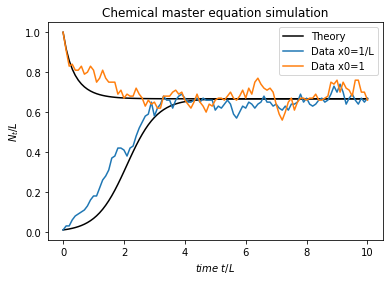

In [86]:
# Theory

t = np.arange(0,tmax+deltat,deltat)/L
f1 = kp*np.exp(kp*t)/( (kp+km)*(np.exp(kp*t) -1) +kp )   #x0=1
f2 = dx*kp*np.exp(kp*t)/( dx*(kp+km)*(np.exp(kp*t) -1) +kp )  #x0=dx
plt.plot(t,f1,'k', label = 'Theory')
plt.plot(t,f2,'k')

# plot Data Y1 and YL
tlist = np.arange(0,tmax+deltat,deltat)/L
plt.plot(tlist,Y1, label = 'Data x0=1/L')
plt.plot(tlist,YL, label = 'Data x0=1')

plt.title('Chemical master equation simulation')
plt.legend()
plt.xlabel('$time\ t/L$')
plt.ylabel('$N_t /L$')

Use SDE integration of $dX_t =a(X_t ,t)dt +\sigma (X_t ,t) dB_t$

Text(0, 0.5, '$N_t /L$')

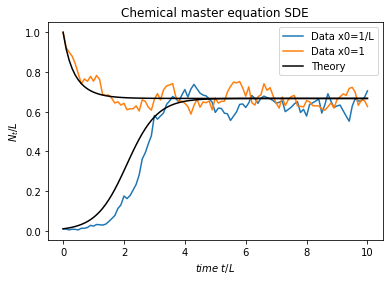

In [88]:
import sdeint

tspan = np.arange(0,tmax+deltat,deltat)/L
#np.linspace(0.0, 10.0, 501)

def a(x, t):
    return x*(kp*(1-x)-km*x)

def sig(x, t):
    return np.sqrt(x*(kp*(1-x)+km*x)/L)

result = sdeint.itoint(a, sig, 1/L, tspan)
plt.plot(tspan,result, label = 'Data x0=1/L')

result = sdeint.itoint(a, sig, 1., tspan)
plt.plot(tspan,result, label = 'Data x0=1')

# Theory

t = np.arange(0,tmax+deltat,deltat)/L
f1 = kp*np.exp(kp*t)/( (kp+km)*(np.exp(kp*t) -1) +kp )   #x0=1
f2 = dx*kp*np.exp(kp*t)/( dx*(kp+km)*(np.exp(kp*t) -1) +kp )  #x0=dx
plt.plot(t,f1,'k', label = 'Theory')
plt.plot(t,f2,'k')

plt.title('Chemical master equation SDE')
plt.legend()
plt.xlabel('$time\ t/L$')
plt.ylabel('$N_t /L$')

## Kingman's Coalescent 

System of L coalescing (merging) particles. Each pair of particles (total number of pairs is $\frac{L(L-1)}{2}$) coalesce independently at rate 1.

Let $N_t$ be the number of particles at time t.

Transition rates g(n,n-1), all other rates are 0.

**Generator**
- every CTMC has a generator: $(G f)(n) = \sum_{n=2}^L g(n,n-1) [ f(n-1) - f(n) ]$

**Waiting Times (holding time)**
- For $n\in E$ define the waiting time $W_n := inf\{ t>0 : N_t \neq n \} =$ first time you leave $n$
- $W_n \sim \exp(g(n,n))$ with $\mathbb{E}[W_n] = \frac{1}{|g(n,n)|}$
- if $|g(n,n)|>0$ then walk jumps to $m \neq n$ after time $W_n$ with probability $\frac{g(n,m)}{|g(n,n)|}$

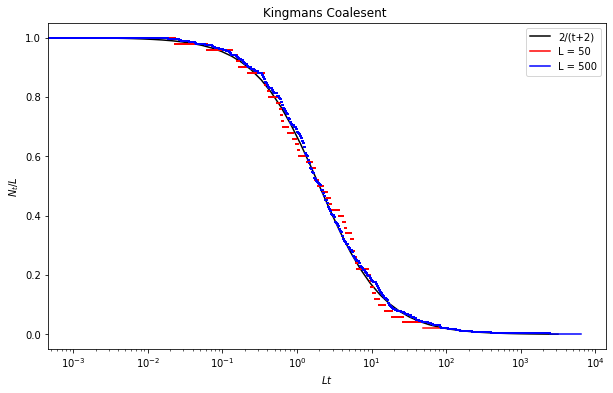

In [14]:
plt.figure(figsize = (10,6))

# Theory

t = np.logspace(-3, 3.5)
f = 2/(t+2)
plt.plot(t,f,'k', label = '2/(t+2)')

# sample paths of the process (2.1 d)

L=50


##### Simulate and PLOT ####

time=0.0 # initialize

for n in range(L,1,-1):  
    gnn = n*(n-1)/2
    waitTime=np.random.exponential(scale=(1./gnn)) # get a waiting time from exponential dist  

    plt.plot([time*L,(time+waitTime)*L],[n/L,n/L],'r',lw=2) # plot a bit
    
    time+=waitTime # update time
plt.plot([time*L,(time+2*waitTime)*L],[1/L,1/L],'r', label = 'L = {}'.format(L)) # also add this line


#Try for fewer particles 
LL = 500
time1=0.0 # initialize

for n in range(LL,1,-1):  
    gnn = n*(n-1)/2
    waitTime1=np.random.exponential(scale=(1./gnn)) # get a waiting time from exponential dist  

    plt.plot([time1*LL,(time1+waitTime1)*LL],[n/LL,n/LL],'b',lw=2) # plot a bit
    
    time1+=waitTime1 # update time

plt.plot([time1*LL,(time1+2*waitTime1)*LL],[1/LL,1/LL],'b', label = 'L = {}'.format(LL)) # also add this line

plt.title('Kingmans Coalesent ')
plt.legend()
plt.xlabel('$L t$')
plt.ylabel('$N_t /L$')

plt.yscale('linear') # linear y scale
plt.xscale('log') # change to log x scale

## Moran model

This is similar to the Wright-Fisher model from problem sheet 1 (expect continuous time). Population of $L$ individuals. 

Let $N_t = \sum_{i =1}^{L} \delta_{X_{t(i),k}}$ be the number of individuals of a single type, $k \in {1,...,L}$ at time $t$. Initially $N_0 =1 $ for all types. 

Recall, $ \frac{d}{dt} \mathbb{E}[f(N_t)] = \mathbb{E}[\mathcal{L}f(N_t)]$

We use am_done function as for the wright fisher model

In [3]:
def am_done(v):
    '''Return true if all elements of v the same. Else false.'''
    u=np.unique(v) # unique  elements of v
    if u.shape[0]>1:
        return False
    else:
        return True

### Simulation:
- Run a process with rate $L$. 
- Waiting times are distributed exponentially with mean $1/L$. 
- When an event occurs pick an individual uniform at random to reproduce and pick an individual uniform at random to be killed.

In [4]:
### Parameters ###

L=50
tmax=5000
deltat=0.1

#################

X=np.arange(L)   #initialize current state
Y=np.zeros((1,L),dtype='int') # initialize output array
Y[0,:]=X  

time=0.0
nextout=deltat

rate=L 

while (time<tmax): # loop until done 
    while (time<nextout):
        type_to_spread=np.random.choice(X) 
        idx=np.random.choice(np.arange(L))
        X[idx]=type_to_spread # infect    
        X=np.sort(X)  
        #wait=1/rate
        wait=np.random.exponential((1./rate)) # wait time
        time+=wait

    Y=np.append(Y,[X],axis=0)
    nextout+=deltat
        
    if(am_done(X)):
        time=tmax+1.


Text(69.0, 0.5, 'Time/$\\Delta t$')

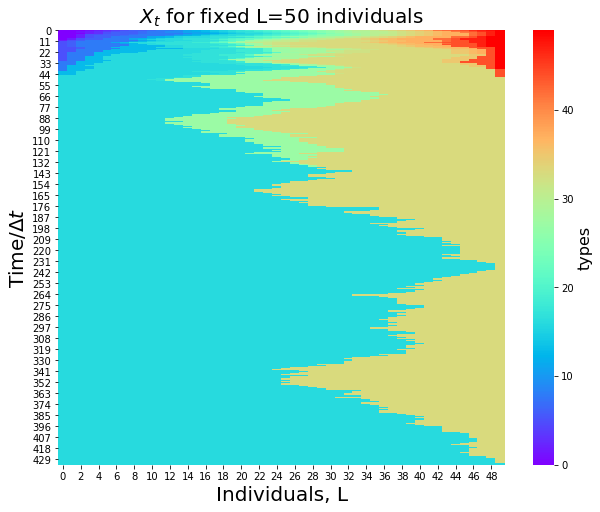

In [5]:
plt.figure(figsize = (10,8))
pcm = sns.heatmap(Y,cbar_kws={'label': 'types'.format(L)},cmap="rainbow")
pcm.figure.axes[-1].yaxis.label.set_size(16)
plt.title('$X_t$ for fixed L={} individuals'.format(L), fontsize = 20)
plt.xlabel('Individuals, L', fontsize = 20)
plt.ylabel('Time/$\Delta t$', fontsize = 20)

In [6]:
start_times=np.arange(np.shape(Y)[0])*deltat

In [7]:
def X_to_N(X):
    N=np.zeros_like(X)
    length=np.shape(N)[0]
    L=np.shape(N)[1]
    for row in range(length):
        row_list=list(X[row,:])
        for i in range(L):
            N[row,i]=row_list.count(i)   
    return N

In [8]:
N=X_to_N(Y)

Text(0.5, 1.0, '$N_t$ Number of individuals of each species \n out of total population size L = 50')

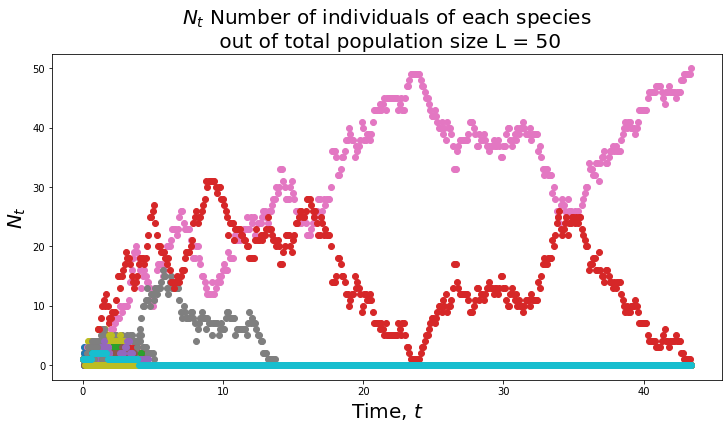

In [9]:
plt.figure(figsize = (12,6))
for i in range(L):
    plt.plot(start_times,N[:,i],'o')
    
plt.xlabel('Time, $t$', fontsize = 20)
plt.ylabel('$N_t$', fontsize= 20)

plt.title("$N_t$ Number of individuals of each species \n out of total population size L = {}".format(L), fontsize = 20)